# Data Mining Project : Predicting Income Category of Individuals

## Context

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc. 

There are 15 attributes which are the demographics and other features to describe a person. We can explore the possibility of predicting income level based on the individual’s personal information.

### Description

This intermediate level data set was extracted from the census bureau database. There are 48,842 instances of the data set, a mix of continuous and discrete

The data set has 15 attributes which include age, sex, education level, and other relevant details of a person. 

- **age**: The age of an individual.
- **workclass**: The type of work or employment of an individual. It can have the following categories:
    - Private: Working in the private sector.
    - Self-emp-not-inc: Self-employed individuals who are not incorporated.
    - Self-emp-inc: Self-employed individuals who are incorporated.
    - Federal-gov: Working for the federal government.
    - Local-gov: Working for the local government.
    - State-gov: Working for the state government.
    - Without-pay: Not working and without pay.
    - Never-worked: Never worked before.
- **fnlwgt/final weight**: The weights on the CPS files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 
    - These are:
        - A single cell estimate of the population 16+ for each state.
        - Controls for Hispanic Origin by age and sex.
        - Controls by Race, age, and sex.
    
    > We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.
    
    > People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
    
- **education**: The highest level of education completed.
- **education-num**: The number of years of education completed.
- **marital-status**: The marital status.
- **occupation**: Type of work performed by an individual.
- **relationship**: The relationship status.
- **race**: The race of an individual.
- **sex**: The gender of an individual.
- **capital-gain**: The amount of capital gain (financial profit).
- **capital-loss**: The amount of capital loss an individual has incurred.
- **hours-per-week**: The number of hours worked per week.
- **native-country**: The country of origin or the native country.
- **income**: The income level of an individual and serves as the target variable. It indicates whether the income is greater than $50,000 or less than or equal to $50,000, denoted as (>50K, <=50K).

### More information

**fnlwgt (final weight)** in the context of the Current Population Survey (CPS) files, provided by the US Census Bureau:

#### **Overview of `fnlwgt` (Final Weight)**

* **Purpose**: The `fnlwgt` is a weight assigned to each respondent in the CPS to ensure the sample represents the civilian non-institutional population of the United States.
* **Controlled to**: The weights are calibrated to match independent estimates of the US population, provided by the Census Bureau's Population Division.

#### **Three Sets of Controls Used for Weighting**

1. **Single Cell Estimate for Population 16+ by State**:
	* **What**: Ensures the weighted sample matches the estimated number of individuals aged 16 and older in each state.
	* **Why**: Important for state-level analyses and to ensure representation across different geographic areas.

2. **Hispanic Origin by Age and Sex Controls**:
	* **What**: Adjusts the weights so that the distribution of Hispanic origin (e.g., Hispanic or Not Hispanic) by age (e.g., different age groups) and sex (male/female) in the sample matches the known population characteristics.
	* **Why**: To accurately represent the diverse Hispanic population across different age and sex groups.

3. **Controls by Race, Age, and Sex**:
	* **What**: Similar to the Hispanic origin controls, but focused on the broader racial demographics, ensuring the sample's racial, age, and sex distributions align with the population's known characteristics.
	* **Why**: For accurate representation of racial and demographic diversity in analyses.

#### **"Raking" Process**

* **What is "Raking"?**: An iterative weighting process where the sample is adjusted to match all three control sets simultaneously. In this case, the process is repeated **6 times** to ensure the weighted sample closely aligns with all specified controls.

#### **Important Caveat: Similar Weights for Similar Demographic Characteristics Within State**

* **Key Point**: Respondents with similar demographic traits (e.g., age, sex, race, Hispanic origin) **within the same state** will have similar weights. This is because each state's sample has its own selection probability.
* **Implication**: When analyzing data, the similarity in weights for similar demographic characteristics only applies **within-state**, not across different states.

#### **Example to Illustrate the Concept**

Suppose you're analyzing the employment rates among young adults (16-24 years old) in California and New York.

* **Similar Demographics, Different States**: A 22-year-old Hispanic male in California and another in New York, despite having similar demographic characteristics, might not have the exact same weight due to the state-specific sampling probabilities.
* **Similar Demographics, Same State**: However, two 22-year-old Hispanic males in California would likely have similar weights, as the weighting ensures representation within each state's demographic breakdowns.

## Exploratory Data Analysis

### Load Data

In [54]:
import pandas as pd

df = pd.read_csv('data/Income_category.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [55]:
import numpy as np

df.replace('?', np.NAN, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Initial Data Exploration

In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Attributes in the dataset containing missing values are:
- workclass 
- occupation
- native-country

In [6]:
print(df['workclass'].unique(), '\n')
print(df['occupation'].unique(), '\n')
print(df['native-country'].unique())

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [7]:
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

### Data Cleaning

In [58]:
df.duplicated().sum()

52

In [59]:
df_dup = df[df.duplicated()]
df_dup.sort_values(by='fnlwgt')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
45127,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
38156,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
25189,29,NaN,41281,Bachelors,13,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,50,United-States,<=50K
38775,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21385,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
34148,45,Private,82797,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
34979,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
27912,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


- Remove duplicated rows

In [60]:
df_dup = df_dup[df_dup.duplicated()]
df_dup.sort_values(by='fnlwgt')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38581,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
31340,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [61]:
df.shape

(48842, 15)

In [62]:
# Identify duplicated rows
df_dup = df[df.duplicated()]

df_dup = df_dup[df_dup.duplicated()]

# Drop duplicated rows
df.drop(df_dup.index, inplace=True)
df.shape

(48839, 15)

### Data Analysis

In [13]:
df.describe().style.format("{:.2f}")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48839.00,48839.00,48839.00,48839.00,48839.00,48839.00
mean,38.64,189660.48,10.08,1079.13,87.51,40.42
std,13.71,105605.62,2.57,7452.24,403.02,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117549.00,9.00,0.00,0.00,40.00
50%,37.00,178140.00,10.00,0.00,0.00,40.00
75%,48.00,237627.00,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [14]:
import pandas as pd
import dtale

# # method 1 : 
# dtale.show(df)

# method 2 : 
# Start dtale and pass your DataFrame
d = dtale.show(df)
# Open the dtale dashboard in your default web browser
d.open_browser()

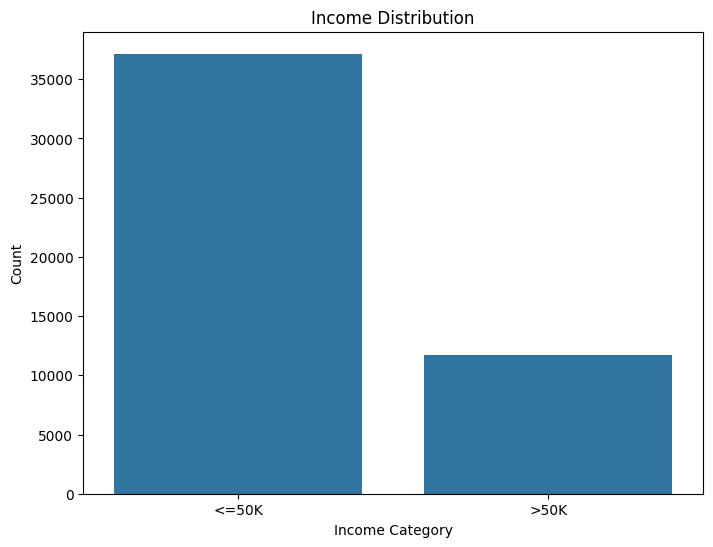

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# Count plot for the income attribute
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

- **Target Variable (Income):** The dataset is heavily skewed towards the **"<=50K"** income group, indicating a potential challenge for classification tasks.

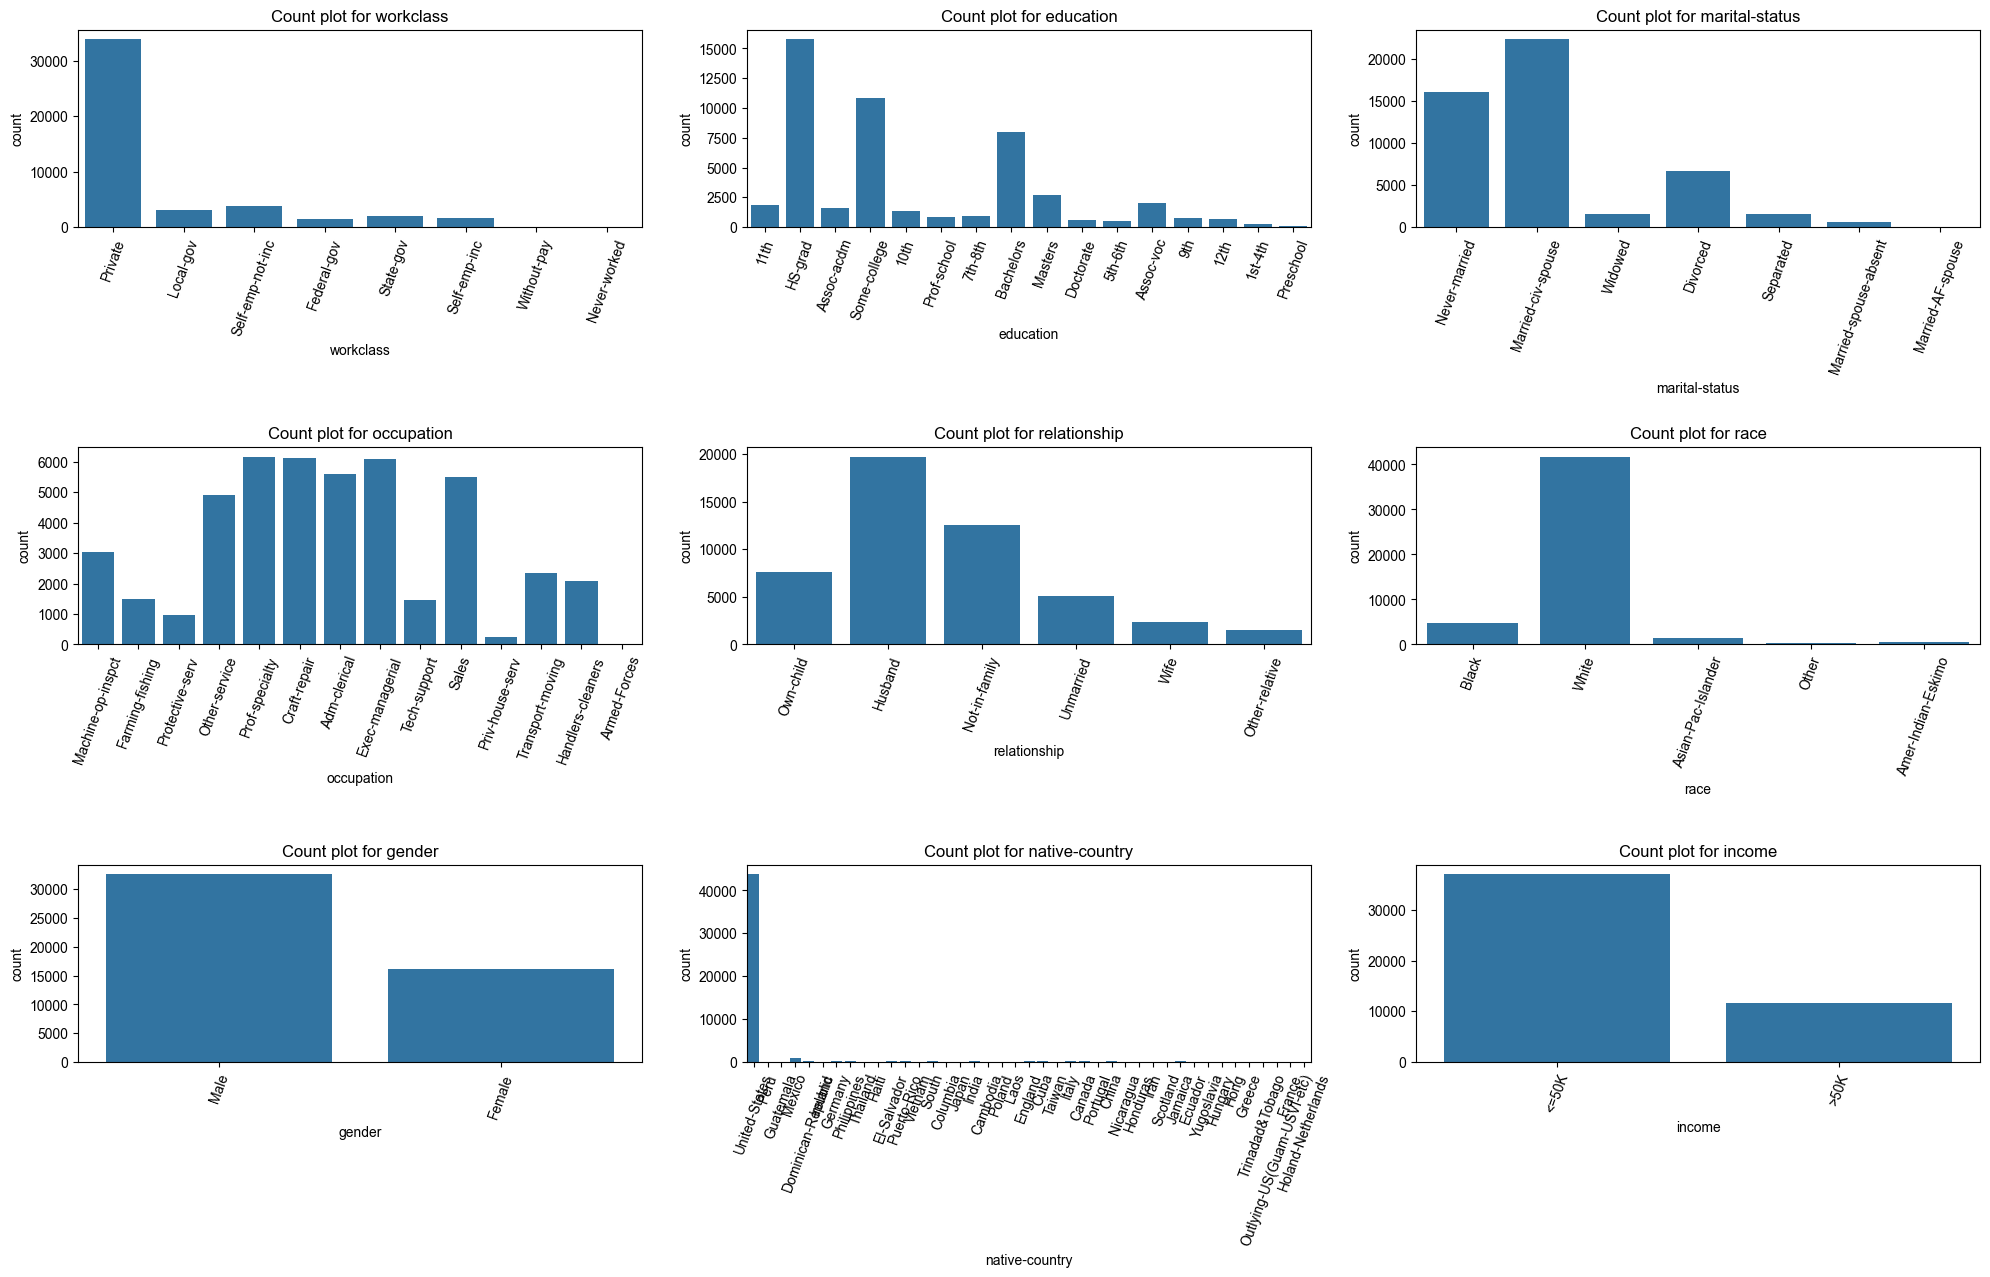

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot count plots for each categorical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Count plot for {column}')
    plt.xticks(rotation=70)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

#### **Analysis**

1. **Imbalances Across Variables:**
   - **Workclass**, **Race**, **Gender**, and **Native Country** are heavily imbalanced, with dominant categories such as "Private" (workclass), "White" (race), "Male" (gender), and "United States" (native country).
   - Rare categories (e.g., "Without-pay" in workclass, "Armed-Forces" in occupation) require careful handling to avoid sparsity issues.

2. **Dominance of Mid-Level Education:** Most individuals have a **high school education or some college**. Higher and lower education levels are underrepresented.

3. **Relationships and Gender Dynamics:** "Husband" dominates the relationship variable, with gender imbalance favoring males. These correlations may impact downstream modeling.

4. **Occupation and Marital Status:** Common occupations (e.g., "Exec-managerial") are well represented, while others (e.g., "Armed-Forces") are rare. Married individuals dominate marital status.

#### **Recommendations**
- Address imbalances with resampling or weighting during modeling.
- Combine or group rare categories (e.g., workclass and occupation) to ensure better representation.
- Investigate interactions (e.g., between gender, relationship, and income) to improve feature engineering.
- Use strategies like stratified sampling or weighted metrics to ensure fairness when handling imbalanced target variables.

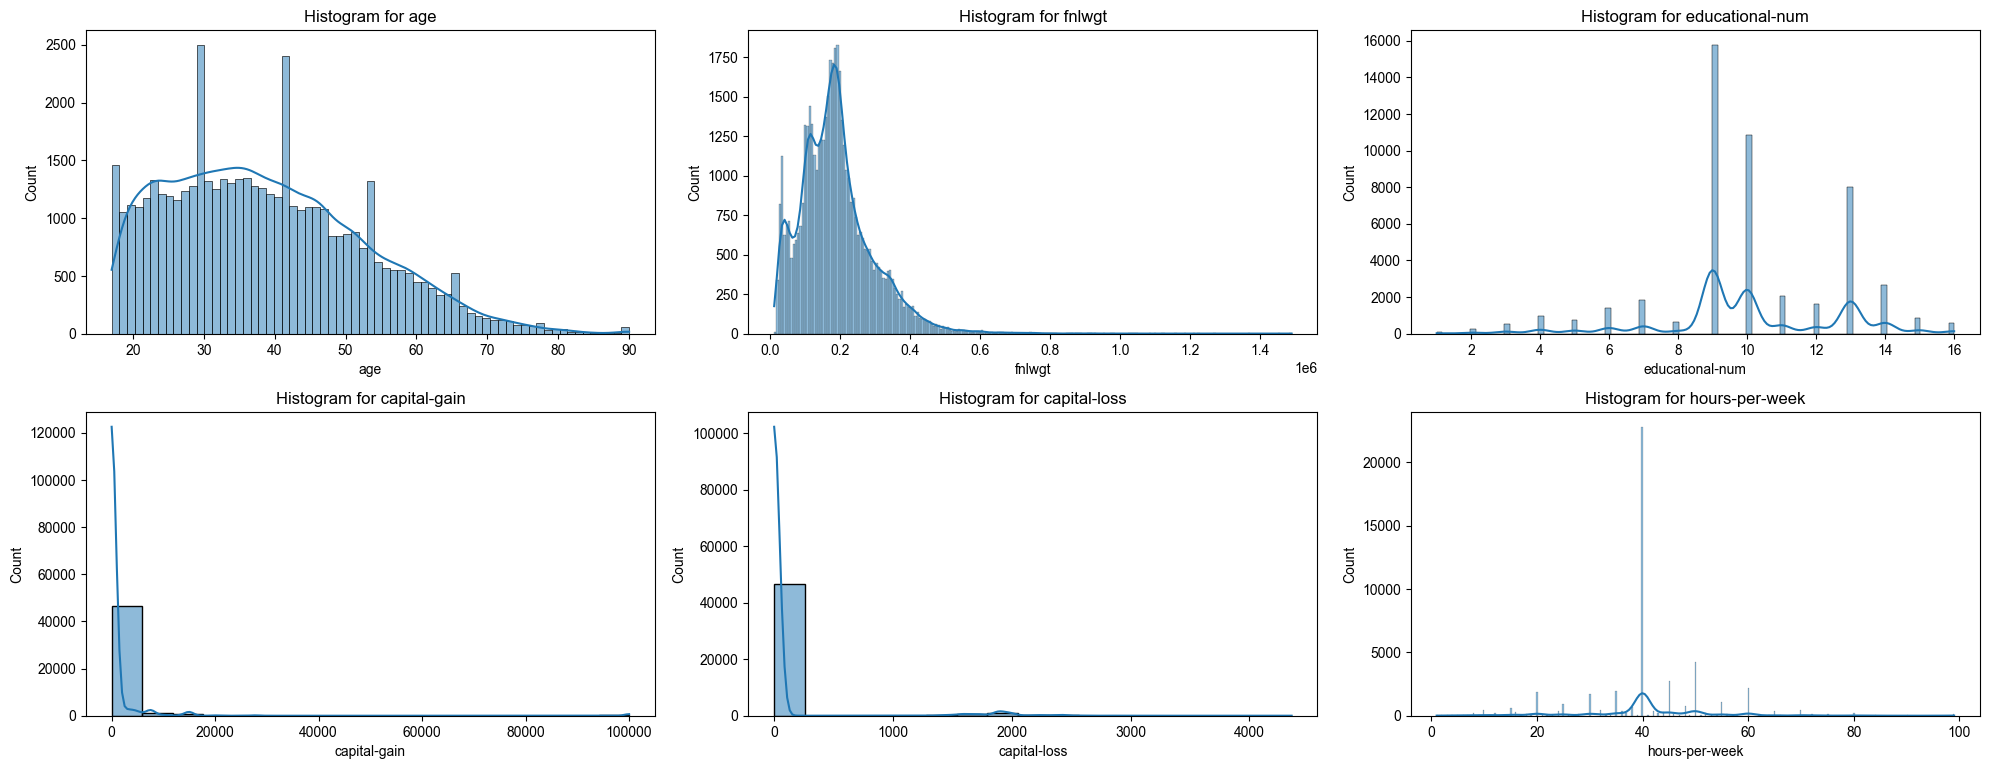

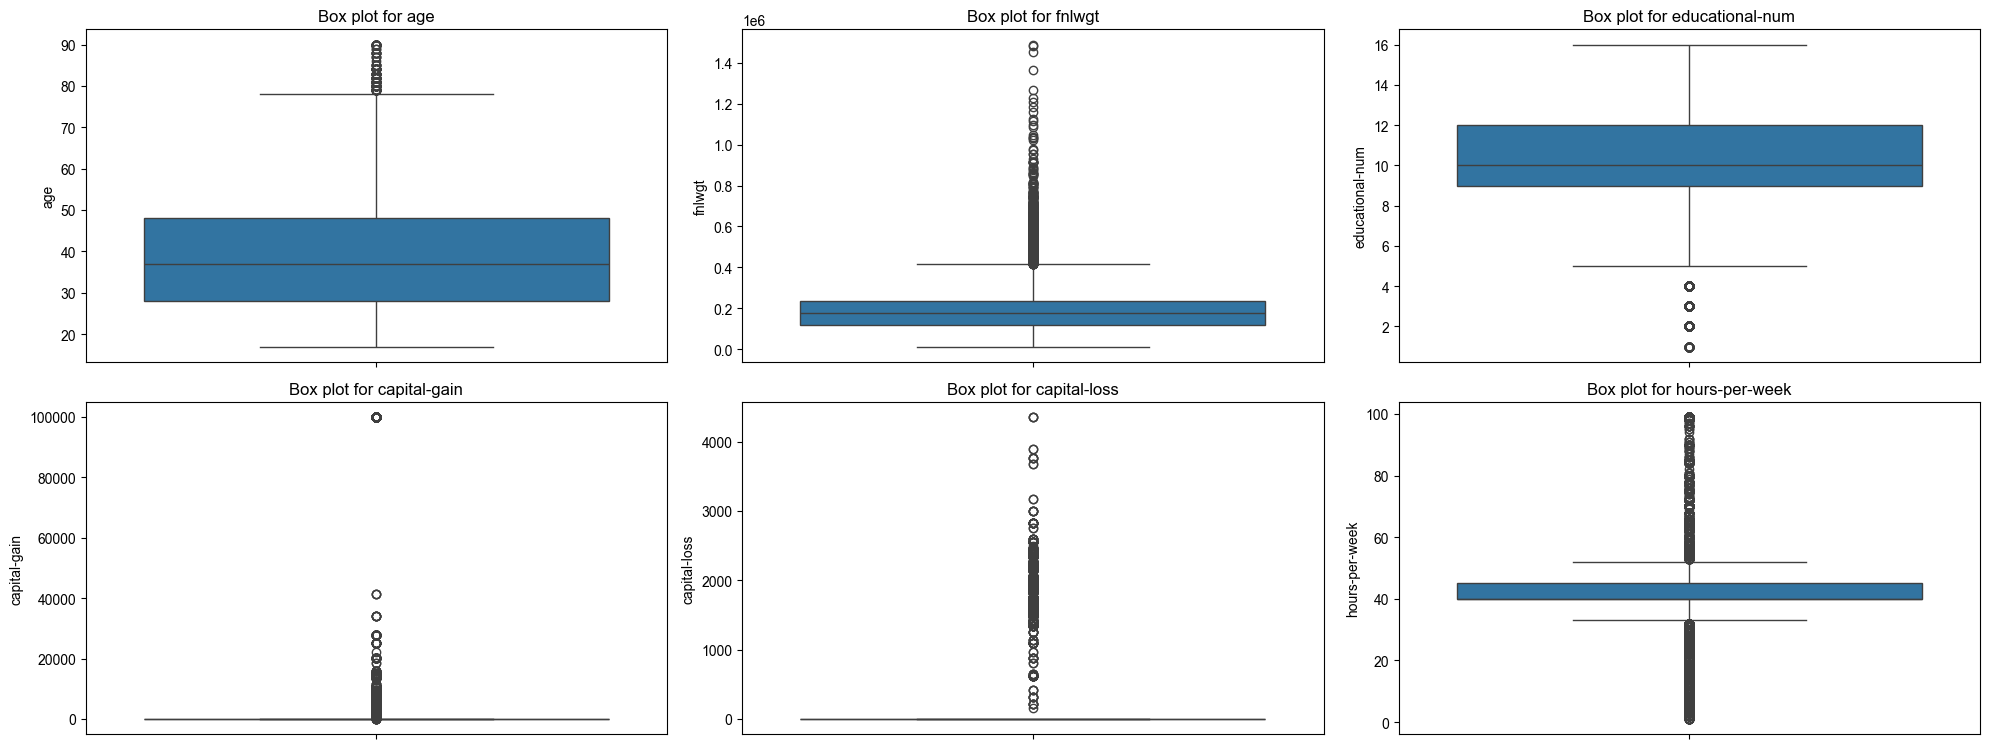

In [17]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
plt.tight_layout()
plt.show()

# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot for {column}')
plt.tight_layout()
plt.show()

#### **Analysis**

1. **Key Insights:**
   - **Age:** Most individuals are between **20 and 50**, with outliers for older individuals (>70).
   - **Final Weight (`fnlwgt`):** Heavily skewed, with extreme outliers in the upper range.
   - **Educational Number (`educational-num`):** Multimodal distribution, with peaks at **9 (High School Grad)** and **10-13 (College Levels)**.
   - **Capital Gain and Loss:** Highly sparse, with most values at **0** and a few extreme outliers.
   - **Hours per Week:** Peaks at **40 hours (full-time)**, with outliers for very high or very low working hours.

2. **Common Patterns:**
   - Skewed distributions in **`fnlwgt`**, `capital-gain`, and `capital-loss` indicate the need for transformations.
   - Outliers in **hours-per-week**, `capital-gain`, and `age` may represent unique cases or errors.
   - **Educational-num** and **hours-per-week** show meaningful patterns that could strongly correlate with income.

#### **Recommendations**

1. **Handle Skewed Distributions:**
   - Apply **log transformations** to `fnlwgt`, `capital-gain`, and `capital-loss` to reduce skewness.
   - Alternatively, binarize `capital-gain` and `capital-loss` into categories like `Has Gain` and `No Gain`.

2. **Outlier Handling:**
   - Investigate and decide whether to retain or remove extreme outliers in **age**, `capital-gain`, and `hours-per-week`.
   - If outliers are legitimate (e.g., high-income earners), retain them but consider robust scaling techniques.

3. **Normalize/Standardize Continuous Variables:**
   - Normalize features like `age`, `hours-per-week`, and `educational-num` to ensure they are comparable for machine learning models.

4. **Feature Engineering:**
   - Create new features:
     - **"Has Capital Gain"** and **"Has Capital Loss"** to capture the presence of financial activity.
     - **"Work Intensity"** (e.g., categorize `hours-per-week` into low, medium, high).

5. **Focus on Key Predictors:**
   - Variables like **educational-num**, `hours-per-week`, and `age` show strong patterns and should be prioritized in model building.

6. **Data Visualization and Exploration:**
   - Investigate the relationship between key predictors (e.g., `educational-num`, `hours-per-week`) and the target variable (`income`) to uncover trends and insights.

7. **Missing Value Handling :**
   - For missing data in related attributes, impute values using statistical methods or introduce an "Unknown" category.

#### **Conclusion**
To optimize this dataset for predictive modeling, focus on handling skewed variables, managing outliers, and engineering features that highlight relationships with the target variable. These steps will ensure robust insights and better model performance.

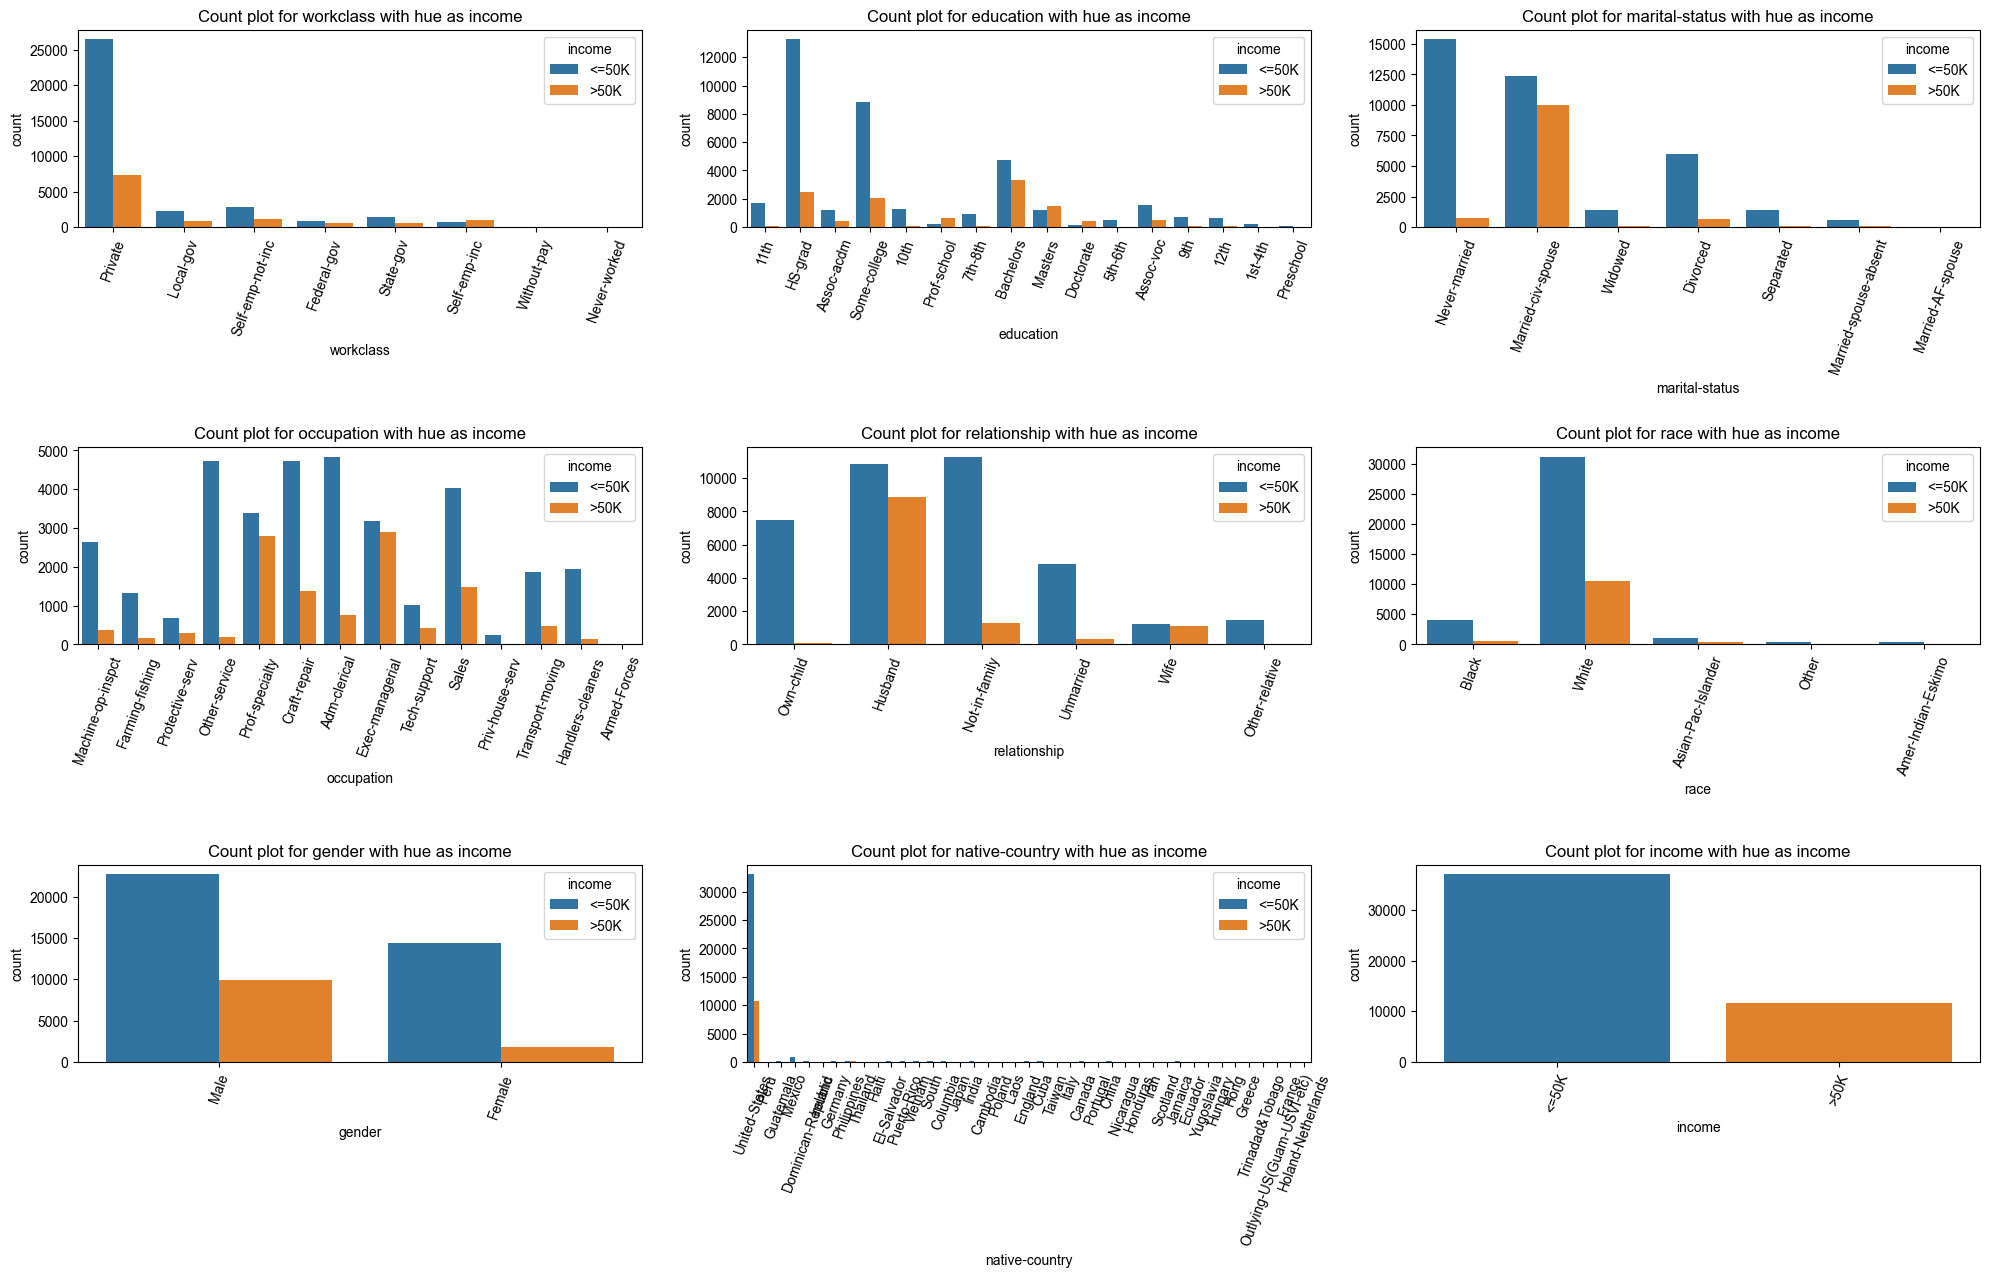

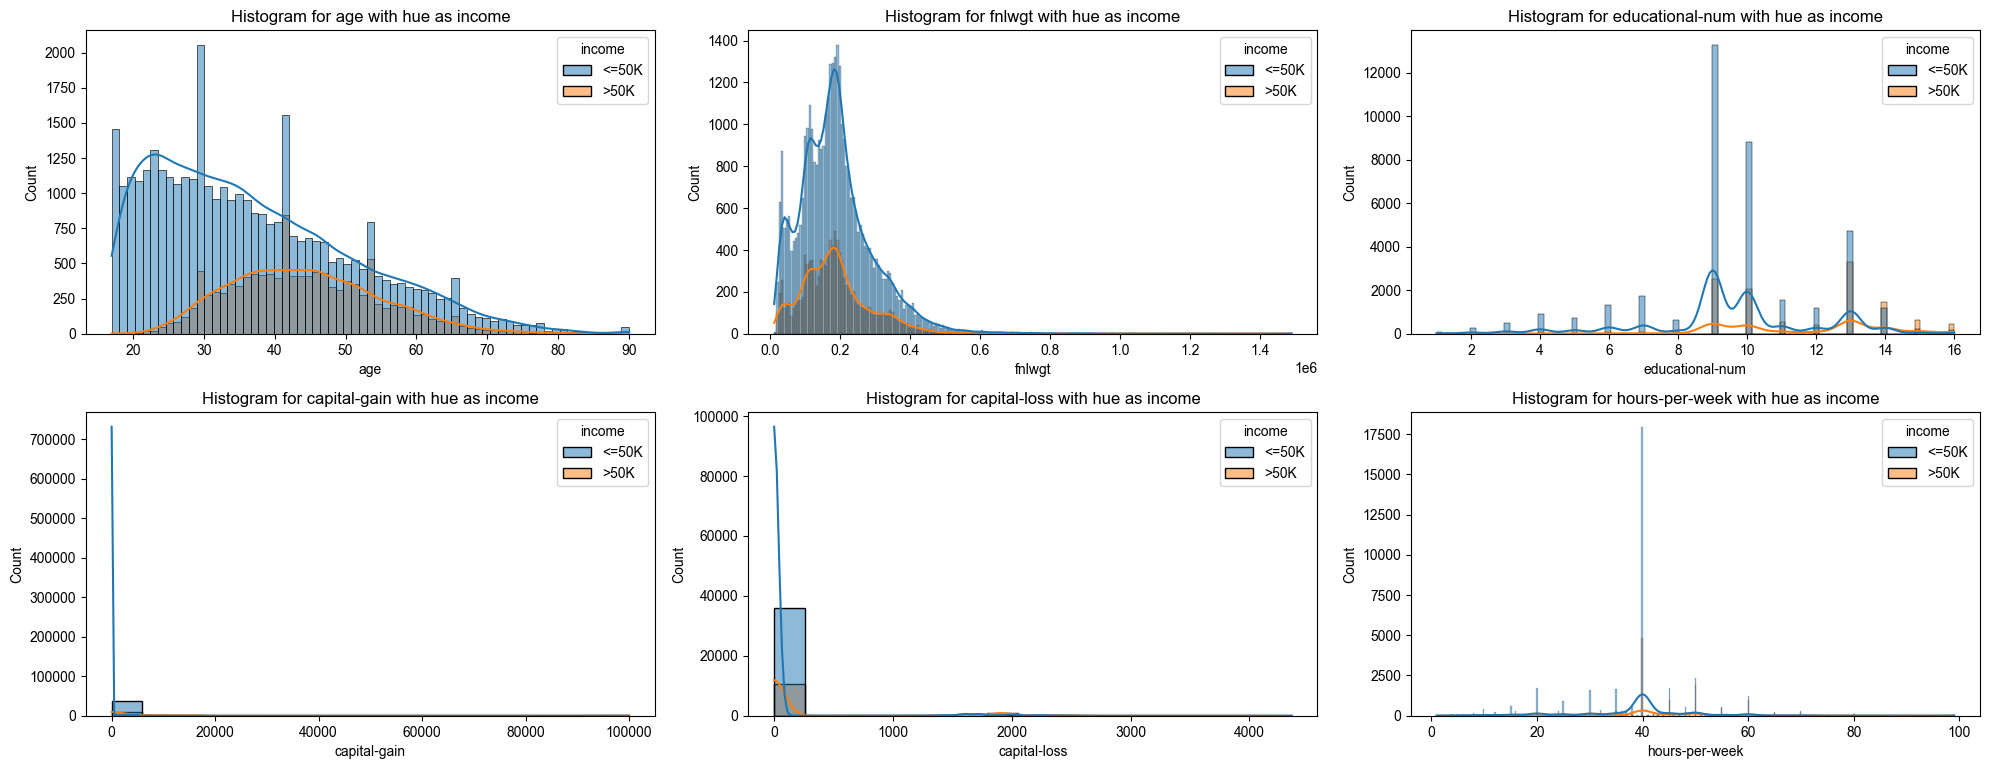

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize categorical columns with hue as income
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=column, hue='income')
    plt.title(f'Count plot for {column} with hue as income')
    plt.xticks(rotation=70)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Visualize numerical columns with hue as income
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=column, hue='income', kde=True)
    plt.title(f'Histogram for {column} with hue as income')
plt.tight_layout()
plt.show()

#### **Analysis**
- **Workclass:**
  - The majority of `>50K` income earners are in **Private** or **Self-employed** roles.
  - Few `>50K` earners come from categories like **Without-pay** or **Never-worked**.

- **Education:**
  - Higher education levels (**Bachelors, Masters, Doctorate, College**) correlate strongly with `>50K` income.
  - Individuals with lower education levels (**11th grade or below**) predominantly fall into the `<=50K` category.

- **Marital Status:** **Married-civ-spouse** dominates the `>50K` category, while **Never-married** is highly concentrated in the `<=50K` group.

- **Occupation:**
  - Roles like **Exec-managerial** and **Prof-specialty** have a high proportion of `>50K` earners.
  - Lower-paying occupations like **Handlers-cleaners** and **Other-service** predominantly fall into the `<=50K` group.

- **Relationship:** **Husbands** are more likely to earn `>50K`, while **Own-child** and **Not-in-family** relationships are concentrated in the `<=50K` group.

- **Race and Gender:** **White males** dominate the `>50K` category, whereas females, especially in lower-income roles, are concentrated in the `<=50K` group.

- **Native Country:** Most `>50K` earners are from the **United States**, with limited representation from other countries.

- **Age:** Older individuals (30–50 years) are more likely to earn `>50K`, while younger individuals (<30) are mostly in the `<=50K` category.

- **Capital Gain and Loss:** A strong positive correlation exists between higher capital gain/loss values and `>50K` income. Most `<=50K` earners have zero capital gains/losses.

- **Hours-per-week:** Individuals working **40+ hours** are more likely to earn `>50K`. However, extreme hours (>80) or very few hours (<20) are more common in the `<=50K` group.



#### **Recommendations**
1. **Feature Engineering:**
   - Combine categorical variables like **education** and **occupation** to create higher-resolution features (e.g., "Education-Occupation Index").
   - Introduce binary features such as **"Has Capital Gain/Loss"** to capture the effect of financial variables.

2. **Address Class Imbalance:** Apply resampling techniques (oversampling or undersampling) or use class weights in the model to handle the imbalance in the target variable.

3. **Target Relationships:** Emphasize key predictors such as **age**, **hours-per-week**, and **education**, as they show strong differentiation between income groups.

4. **Outlier Management:** Analyze extreme values in **capital-gain**, **capital-loss**, and **hours-per-week** to determine whether they are valid or need to be treated.

5. **Gender and Race Bias:** Ensure fair modeling by checking for biases introduced by over-representation of **White males** in the `>50K` category.

6. **Normalize or Transform Features:** Use log transformations for skewed variables like **capital-gain** and **fnlwgt** to improve model performance.

7. **Explore Work Sector:** Analyze the interaction between **workclass**, **occupation**, and **hours-per-week** to create features reflecting workload intensity or job role stability.

This analysis highlights strong correlations between education, work characteristics, and income levels. Proper handling of imbalanced data and thoughtful feature engineering will enhance predictive model performance and fairness.

In [19]:
import copy
df_copy = copy.deepcopy(df)

In [20]:
df = copy.deepcopy(df_copy)

In [21]:
df1 = copy.deepcopy(df_copy)

      workclass         occupation  avg_hours_per_week
0   Federal-gov       Adm-clerical           40.429158
1   Federal-gov       Armed-Forces           41.600000
2   Federal-gov       Craft-repair           40.892473
3   Federal-gov    Exec-managerial           42.264925
4   Federal-gov    Farming-fishing           40.000000
..          ...                ...                 ...
78  Without-pay  Handlers-cleaners           50.000000
79  Without-pay  Machine-op-inspct           32.500000
80  Without-pay      Other-service           32.500000
81  Without-pay              Sales           45.000000
82  Without-pay   Transport-moving           20.000000

[83 rows x 3 columns]


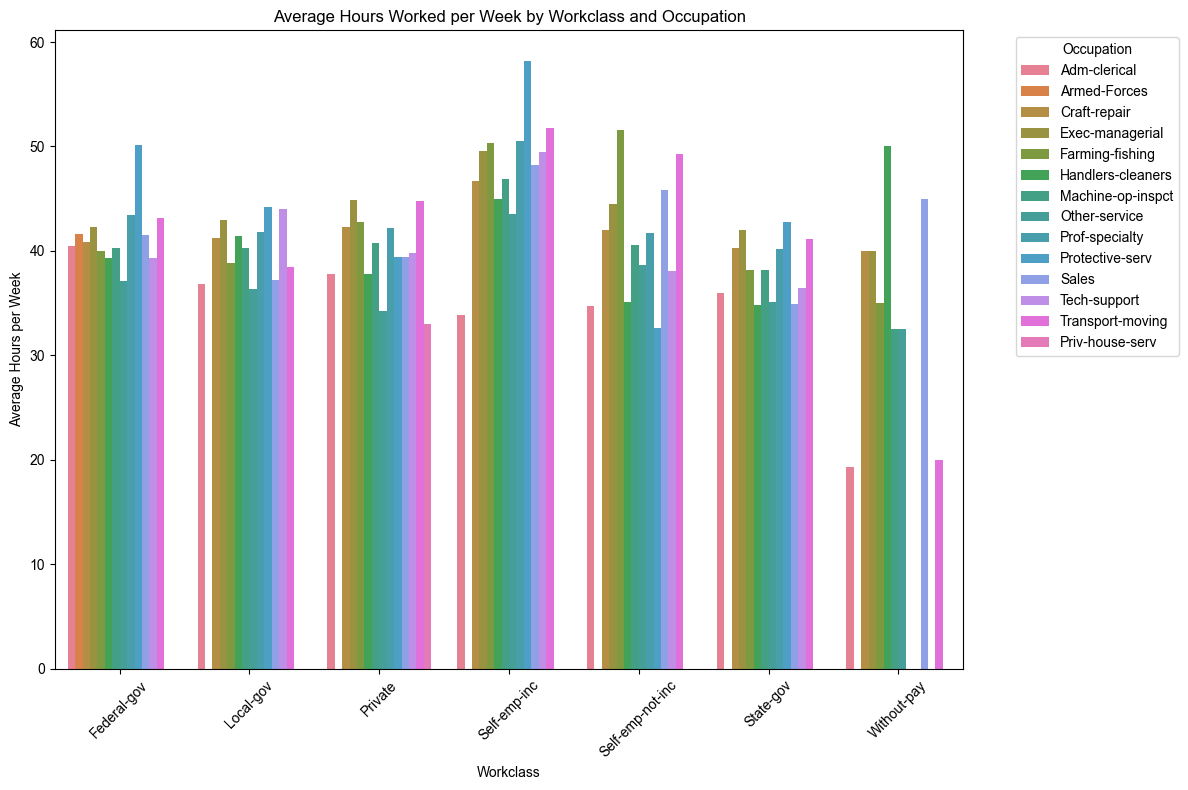

           workclass         occupation  avg_hours_per_week
46      Self-emp-inc    Protective-serv           58.200000
49      Self-emp-inc   Transport-moving           51.763158
53  Self-emp-not-inc    Farming-fishing           51.617152
45      Self-emp-inc     Prof-specialty           50.555102
41      Self-emp-inc    Farming-fishing           50.341463
..               ...                ...                 ...
58  Self-emp-not-inc    Protective-serv           32.571429
79       Without-pay  Machine-op-inspct           32.500000
80       Without-pay      Other-service           32.500000
82       Without-pay   Transport-moving           20.000000
74       Without-pay       Adm-clerical           19.333333

[83 rows x 3 columns]


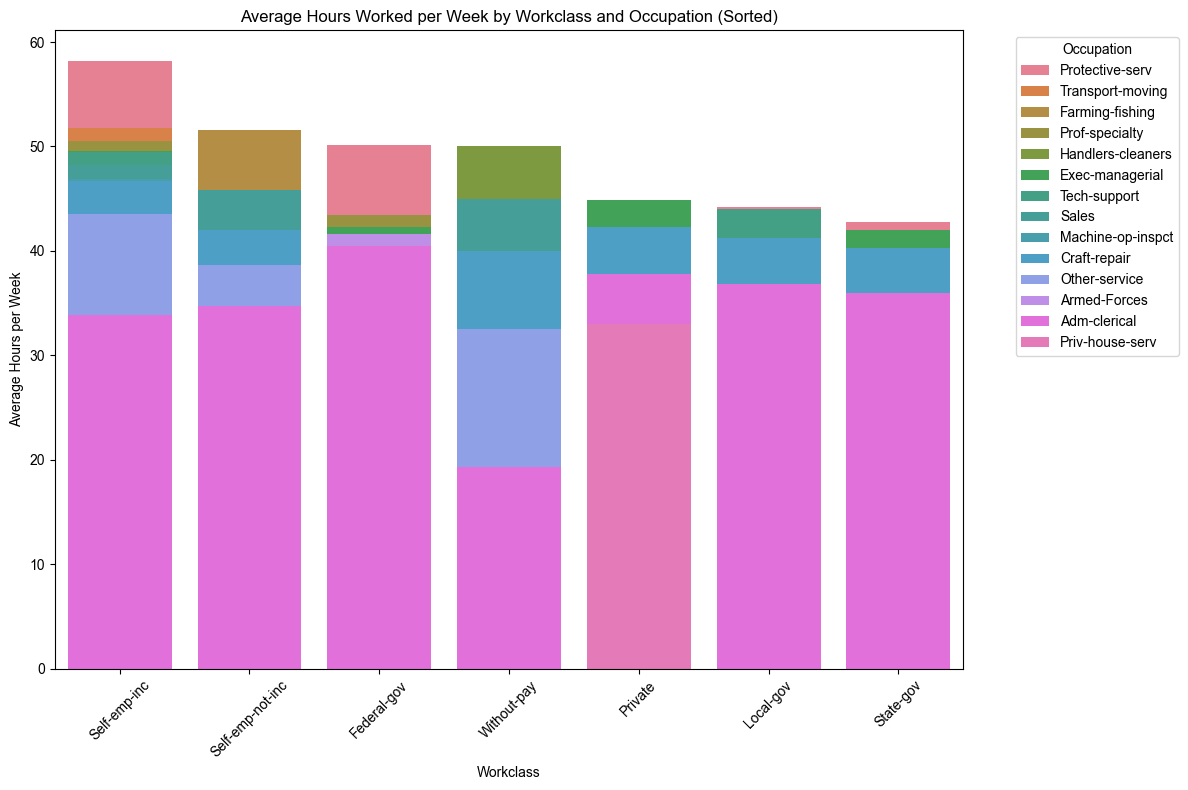

       workclass       occupation  hours-per-week workload_intensity  \
29069  State-gov   Prof-specialty              99          Very High   
2690   Local-gov  Protective-serv              99          Very High   
43139    Private   Prof-specialty              99          Very High   
39460    Private  Farming-fishing              99          Very High   
21713    Private   Prof-specialty              99          Very High   

       job_role_stability  
29069                58.0  
2690                 52.0  
43139                67.0  
39460                60.0  
21713                67.0  


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group by workclass and occupation to analyze average hours-per-week
work_sector_analysis = (
    df.groupby(['workclass', 'occupation'])['hours-per-week']
    .mean()
    .reset_index()
    .rename(columns={'hours-per-week': 'avg_hours_per_week'})
)

# Display the grouped analysis
print(work_sector_analysis)

# **Visualization 1: Unsored Average Hours Worked by Workclass and Occupation**
plt.figure(figsize=(12, 8))
sns.barplot(
    data=work_sector_analysis,
    x='workclass',
    y='avg_hours_per_week',
    hue='occupation',
)
plt.xticks(rotation=45)
plt.title('Average Hours Worked per Week by Workclass and Occupation')
plt.ylabel('Average Hours per Week')
plt.xlabel('Workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Occupation")
plt.tight_layout()
plt.show()

# **Sorting by Average Hours Worked**
work_sector_analysis_sorted = work_sector_analysis.sort_values(by='avg_hours_per_week', ascending=False)

# Display the sorted grouped analysis
print(work_sector_analysis_sorted)

# **Visualization 2: Sorted Average Hours Worked by Workclass and Occupation**
plt.figure(figsize=(12, 8))
sns.barplot(
    data=work_sector_analysis_sorted,
    x='workclass',
    y='avg_hours_per_week',
    hue='occupation',
    dodge=False,  # Optional: Adjust overlap of bars
)
plt.xticks(rotation=45)
plt.title('Average Hours Worked per Week by Workclass and Occupation (Sorted)')
plt.ylabel('Average Hours per Week')
plt.xlabel('Workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Occupation")
plt.tight_layout()
plt.show()

# **Create Workload Intensity and Job Role Stability Features**
# Define workload categories based on hours-per-week
def workload_intensity(hours):
    if hours < 20:
        return 'Low'
    elif 20 <= hours <= 40:
        return 'Moderate'
    elif 40 < hours <= 60:
        return 'High'
    else:
        return 'Very High'

# Apply workload intensity to the dataset
df1['workload_intensity'] = df1['hours-per-week'].apply(workload_intensity)

# Assign stability score based on frequency of workclass-occupation pair
job_stability_scores = (
    df.groupby(['workclass', 'occupation']).size().rank(method='dense').to_dict()
)
df1['job_role_stability'] = df.apply(
    lambda row: job_stability_scores.get((row['workclass'], row['occupation']), 0), axis=1
)

# Display the new features with sorted occupation analysis
sorted_features_df = df1[['workclass', 'occupation', 'hours-per-week', 'workload_intensity', 'job_role_stability']].sort_values(by='hours-per-week', ascending=False)
print(sorted_features_df.head())

In [23]:
df1.shape

(48839, 17)

In [24]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workload_intensity,job_role_stability
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Moderate,66.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,High,60.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Moderate,52.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Moderate,66.0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,Moderate,0.0


#### **Analysis**

1. **Workload Patterns:**
   - Most occupations across workclasses average **40–45 hours per week**. However, certain roles, like **Exec-managerial** and **Farming-fishing**, tend to exceed this range.
   - **Without-pay** workclass exhibits high variability in hours, with some roles working very few hours (e.g., **Transport-moving**) and others disproportionately high (e.g., **Handlers-cleaners** at 50 hours).

2. **Workload Intensity:**
   - The majority of roles fall into **Moderate (20–40 hours)** or **High (40–60 hours)** workload categories.
   - Few extreme roles appear in the **Low (<20)** or **Very High (>60)** workload ranges.

3. **Job Role Stability:**
   - Stable roles (e.g., **Adm-clerical**, **Machine-op-inspct**) are more frequent in private and government sectors.
   - Low-frequency combinations like **Transport-moving** or certain roles in "Without-pay" indicate instability and potential irregularities.

#### **Recommendations**

1. **Feature Engineering:**
   - Use **average hours worked by workclass and occupation** as a feature to reflect workload expectations.
   - Retain **workload_intensity** and **job_role_stability** as additional features to capture variability and stability for machine learning models.

2. **Address Variability:** Investigate outliers in **Without-pay** and self-employed categories to understand why certain roles have highly variable or extreme workloads.

3. **Segmented Analysis:** For predictive tasks, consider segmenting by workclass (e.g., "Private" vs. "Self-employed") as workload and stability patterns differ significantly across these sectors.

4. **Work-Life Balance Monitoring:** Highlight roles consistently exceeding **50+ hours per week** (e.g., **Exec-managerial**, **Farming-fishing**) for potential intervention in balancing workload and employee well-being.

5. **Data Check:** Examine cases with missing or irregular data in **Without-pay** and roles with extreme values in hours (e.g., very high or very low) to ensure consistency.

Analyzing workload and job stability across workclasses provides critical insights into patterns and potential anomalies. Incorporating these engineered features and addressing irregularities will enhance model robustness and allow for better insights into workforce dynamics.

## Data Preprocessing

### Enoding Categorical Variables

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48839 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48839 non-null  int64 
 1   workclass        46040 non-null  object
 2   fnlwgt           48839 non-null  int64 
 3   education        48839 non-null  object
 4   educational-num  48839 non-null  int64 
 5   marital-status   48839 non-null  object
 6   occupation       46030 non-null  object
 7   relationship     48839 non-null  object
 8   race             48839 non-null  object
 9   gender           48839 non-null  object
 10  capital-gain     48839 non-null  int64 
 11  capital-loss     48839 non-null  int64 
 12  hours-per-week   48839 non-null  int64 
 13  native-country   47982 non-null  object
 14  income           48839 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [90]:
categoricals = list(df.select_dtypes(include='object'))

In [91]:
# Print value counts for each categorical column
for col in categoricals:
    print(f'\nunique values for {col}:')
    print(df[col].unique())


unique values for workclass:
['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

unique values for education:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

unique values for occupation:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

unique values for relationship:
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

unique values for race:
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

unique values for gender

In [92]:
df_copy = copy.deepcopy(df)

In [80]:
df = copy.deepcopy(df_copy)

In [93]:
df_non = df.dropna()

In [94]:
df_non.shape

(45219, 15)

In [95]:
df_non.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [96]:
# Create a DataFrame containing only instances with missing values
df_missing = df[df.isnull().any(axis=1)]
print(df_missing.shape)
df_missing.head()

(3620, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K


- *7%* of the data is lost after removing rows with missing values.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Make a copy of the dataset
encoded_df = df_non.copy()

# Define attributes that need order
ordinal_columns = ['income', 'education']

# Define the order for 'income' and 'education'
income_order = ['<=50K', '>50K']  # Binary target with natural order
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', 
                   '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
                   'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[income_order, education_order])
encoded_df[ordinal_columns] = ordinal_encoder.fit_transform(encoded_df[ordinal_columns])

# Save the ordinal encoder for reuse
import pickle
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)

# Define the remaining attributes that do not need order
nominal_columns = ['workclass', 'marital-status', 'gender', 
                   'occupation', 'relationship', 'race', 'native-country']

# Apply Label Encoding to nominal columns
label_encoders = {}
for col in nominal_columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))  # Handle NaN as string
    label_encoders[col] = le

# Save the label encoders for reuse
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

# Check the encoded DataFrame
print(f"Shape after encoding: {encoded_df.shape}")
print("Encoded DataFrame:")
encoded_df.head()

Shape after encoding: (48839, 15)
Encoded DataFrame:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,6.0,7,4,6,3,2,1,0,0,40,38,0.0
1,38,3,89814,8.0,9,2,4,0,4,1,0,0,50,38,0.0
2,28,1,336951,11.0,12,2,10,0,4,1,0,0,40,38,1.0
3,44,3,160323,9.0,10,2,6,0,2,1,7688,0,40,38,1.0
4,18,8,103497,9.0,10,4,14,3,4,0,0,0,30,38,0.0


In [70]:
encoded_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Handling Missing Values

In [73]:
df_copy = copy.deepcopy(df) 

In [71]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [74]:
print(df['workclass'].unique(), '\n')
print(df['occupation'].unique(), '\n')
print(df['native-country'].unique())

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


categorical attributes: workclass, occupation, native-country for handling missing values either : 
- delete intances 
- impute with estimation of values 

since missing values are less than *7%* of the data, we can't delete the instances with missing values.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Example: Predict missing workclass
# Prepare data
workclass_data = df[df['workclass'].notnull()]
missing_workclass_data = df[df['workclass'].isnull()]

# Features and labels for prediction
X = workclass_data.drop(columns=['workclass', 'occupation', 'native-country'])
y = workclass_data['workclass']

# Train-test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict missing workclass
X_missing = missing_workclass_data.drop(columns=['workclass', 'occupation', 'native-country'])
df.loc[df['workclass'].isnull(), 'workclass'] = model.predict(X_missing)

df.isnull().sum()

ValueError: could not convert string to float: '12th'

In [ ]:
# Prepare data for `occupation` imputation
occupation_data = df[df['occupation'].notnull()]
missing_occupation_data = df[df['occupation'].isnull()]

# Features and labels for prediction
X_occupation = occupation_data.drop(columns=['occupation', 'native-country'])
y_occupation = occupation_data['occupation']

# Train-test split and model
X_train_occ, X_test_occ, y_train_occ, y_test_occ = train_test_split(X_occupation, y_occupation, test_size=0.2, random_state=42)
model_occ = RandomForestClassifier(random_state=42)
model_occ.fit(X_train_occ, y_train_occ)

# Predict missing occupation
X_missing_occ = missing_occupation_data.drop(columns=['occupation', 'native-country'])
df.loc[df['occupation'].isnull(), 'occupation'] = model_occ.predict(X_missing_occ)

In [ ]:
# # Impute `native-country` with the most common value (mode)
# df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

In [ ]:
# Prepare data for `native-country` imputation
native_country_data = df[df['native-country'].notnull()]
missing_native_country_data = df[df['native-country'].isnull()]

# Features and labels for prediction
X_country = native_country_data.drop(columns=['native-country'])
y_country = native_country_data['native-country']

# Train-test split and model
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_country, y_country, test_size=0.2, random_state=42)
model_country = RandomForestClassifier(random_state=42)
model_country.fit(X_train_country, y_train_country)

# Predict missing native-country
X_missing_country = missing_native_country_data.drop(columns=['native-country'])
df.loc[df['native-country'].isnull(), 'native-country'] = model_country.predict(X_missing_country)

In [ ]:
# Check for remaining missing values
print("Missing Values After Imputation:")
print(df.isnull().sum())

# Validate distributions of imputed variables
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='workclass')
plt.title('Distribution of Workclass After Imputation')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='occupation')
plt.title('Distribution of Occupation After Imputation')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='native-country')
plt.title('Distribution of Native Country After Imputation')
plt.xticks(rotation=45)
plt.show()

### Encofing & Handling Missing Values

#### **Approach**
missing values are *7%* of dataset, categorical attributes: ``workclass``, ``occupation``, ``native-country`` for handling missing values either : 
- delete intances with missing values
- encode & handle missing values for categorical attributes directly.
- impute with estimation of values, predict missing values from smallest to largest feature with NaN one by one (3) by on features that does not have missing values.

#### Method 1 : Delete Instances with Missing Values

In [113]:
df_copy = copy.deepcopy(df)

In [114]:
df = df.dropna()
print(df.shape)
print(df.isnull().sum())

# save df to csv
df.to_csv('data/data_n_missing_1.csv', index=False)

(45219, 15)
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


#### Method 2 : encode & handle missing values for categorical attributes directly.

In [125]:
df = copy.deepcopy(df_copy)

In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Make a copy of the dataset
encoded_df = df.copy()

# Define attributes that need order
ordinal_columns = ['income', 'education']

# Define the order for 'income' and 'education'
income_order = ['<=50K', '>50K']  # Binary target with natural order
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', 
                   '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
                   'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[income_order, education_order])
encoded_df[ordinal_columns] = ordinal_encoder.fit_transform(encoded_df[ordinal_columns])

# Save the ordinal encoder for reuse
import pickle
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)

# Define the remaining attributes that do not need order
nominal_columns = ['workclass', 'marital-status', 'gender', 
                   'occupation', 'relationship', 'race', 'native-country']

# Apply Label Encoding to nominal columns
label_encoders = {}
for col in nominal_columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))  # Handle NaN as string
    label_encoders[col] = le

# Save the label encoders for reuse
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

# Check the encoded DataFrame
print(f"Shape after encoding: {encoded_df.shape}")
print(f"Missing values after encoding: {encoded_df.isnull().sum().sum()}")
print("Encoded DataFrame:")
encoded_df.head()

Shape after encoding: (48839, 15)
Missing values after encoding: 0
Encoded DataFrame:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,6.0,7,4,6,3,2,1,0,0,40,38,0.0
1,38,3,89814,8.0,9,2,4,0,4,1,0,0,50,38,0.0
2,28,1,336951,11.0,12,2,10,0,4,1,0,0,40,38,1.0
3,44,3,160323,9.0,10,2,6,0,2,1,7688,0,40,38,1.0
4,18,8,103497,9.0,10,4,14,3,4,0,0,0,30,38,0.0


**Approach:**
1. **Attributes that need order (`income`, `education`)**:
   - Use **Ordinal Encoding** with a predefined order.
2. **Attributes that don’t need order**:
   - Use **Label Encoding** or **OneHot Encoding**, depending on your preference. Since we want to minimize complexity, I'll use **Label Encoding** for these attributes.

**Details of the Code:**

1. **Ordinal Encoding for `income` and `education`**:
   - `income` is encoded as:
     - `<=50K`: 0
     - `>50K`: 1
   - `education` is encoded based on the predefined order of education levels.

2. **Label Encoding for Nominal Attributes**:
   - For attributes like `workclass`, `gender`, and `occupation`, categories are label-encoded. NaN values are treated as a separate category (`'nan'`).

3. **Saving Encoders**:
   - Both the ordinal and label encoders are saved using `pickle` for reuse in transforming the test dataset.

4. **Encoded DataFrame**:
   - The resulting DataFrame is ready for machine learning models with all categorical attributes encoded as numerical values.

**Encoded Output Example:**
If the original dataset has:
| workclass  | education  | income | gender  | native-country  |
|------------|------------|--------|---------|-----------------|
| Private    | Bachelors  | <=50K  | Male    | United-States   |
| Local-gov  | HS-grad    | >50K   | Female  | Canada          |

The encoded dataset will look like:
| workclass  | education | income | gender | native-country |
|------------|-----------|--------|--------|----------------|
| 3          | 12        | 0      | 1      | 39             |
| 1          | 9         | 1      | 0      | 4              |


**Decoding for Interpretation:**
To decode any column back to its original values, you can use the saved encoders:

```python
# Load encoders
with open('label_encoders.pkl', 'rb') as file:
    loaded_label_encoders = pickle.load(file)

# Decode 'workclass'
encoded_df['workclass_decoded'] = loaded_label_encoders['workclass'].inverse_transform(encoded_df['workclass'])
print(encoded_df[['workclass', 'workclass_decoded']].head())
```

**Next Steps:**
- Apply this encoding to your dataset.
- Use the saved encoders for consistent transformation of the test dataset.
- Proceed with your machine learning workflow.

In [122]:
# save df to csv
encoded_df.to_csv('data/data_n_missing_2_encoded_.csv', index=False)

### Feature Cross

In [136]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

- Combine capital-gain and capital-loss into a single feature called "Net Capital Gain" to capture the overall financial performance of an individual.


### Handling Outliers

In [11]:
import pandas as pd

df = pd.read_csv('data/data_n_missing_1.csv')
print(df.shape)
df.head()

(45219, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45219 entries, 0 to 45218
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45219 non-null  int64 
 1   workclass        45219 non-null  object
 2   fnlwgt           45219 non-null  int64 
 3   education        45219 non-null  object
 4   educational-num  45219 non-null  int64 
 5   marital-status   45219 non-null  object
 6   occupation       45219 non-null  object
 7   relationship     45219 non-null  object
 8   race             45219 non-null  object
 9   gender           45219 non-null  object
 10  capital-gain     45219 non-null  int64 
 11  capital-loss     45219 non-null  int64 
 12  hours-per-week   45219 non-null  int64 
 13  native-country   45219 non-null  object
 14  income           45219 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


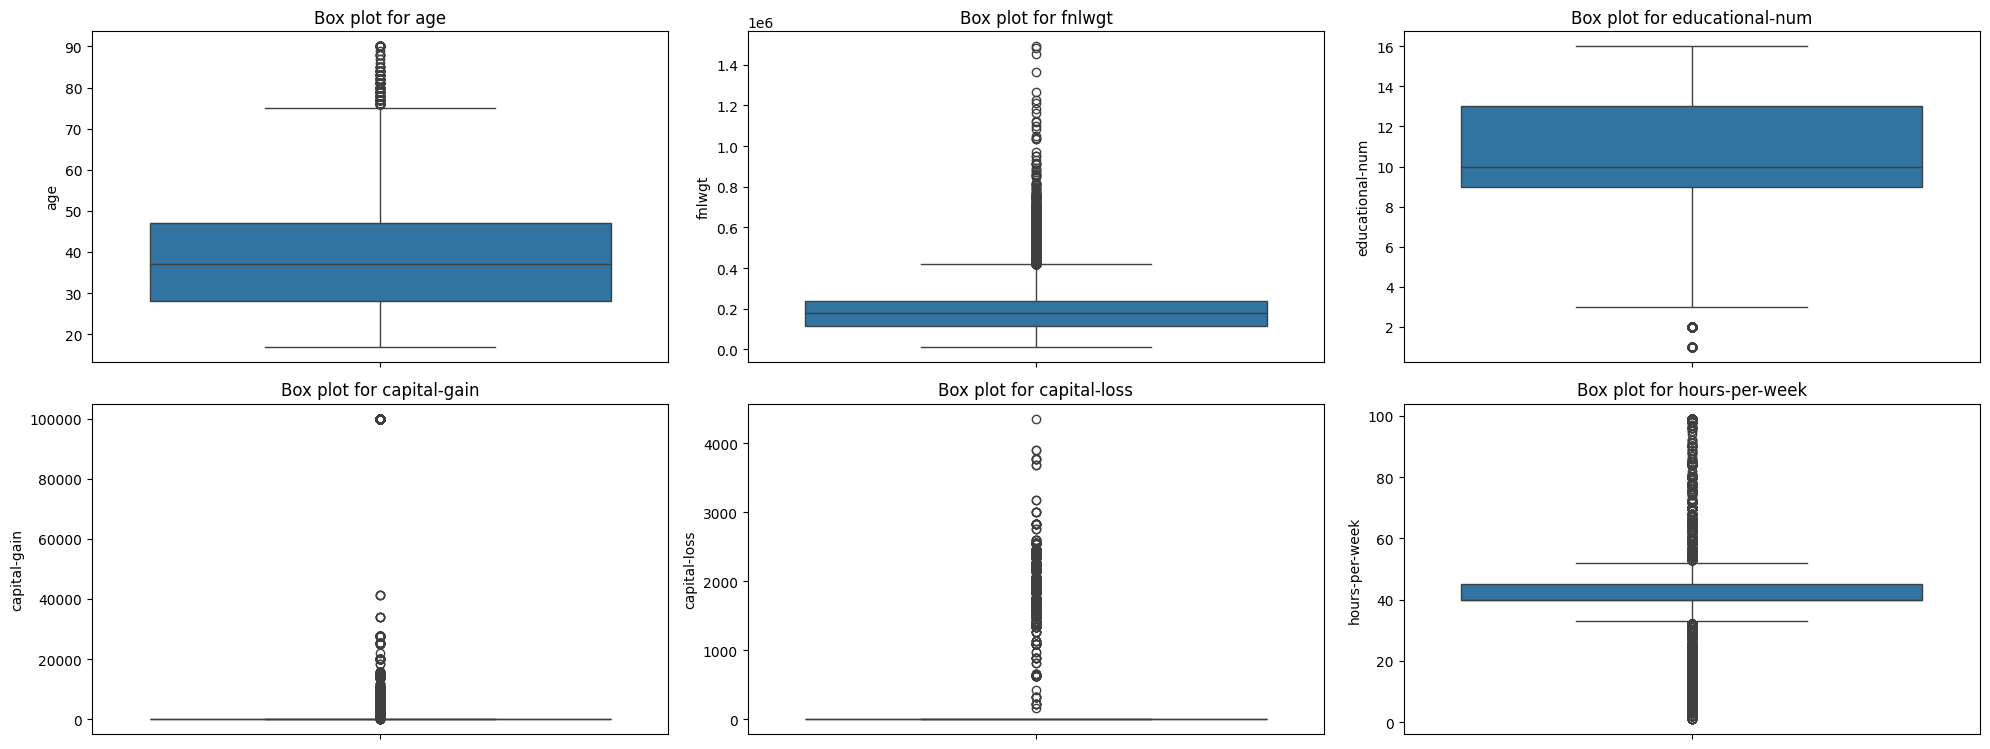

In [13]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot for {column}')
plt.tight_layout()
plt.show()

In [8]:
import copy
df_copy = copy.deepcopy(df)

In [14]:
df = copy.deepcopy(df_copy)

Outlier counts per column:
age                  269
fnlwgt              1331
educational-num      292
capital-gain        3790
capital-loss        2140
hours-per-week     11899
dtype: int64


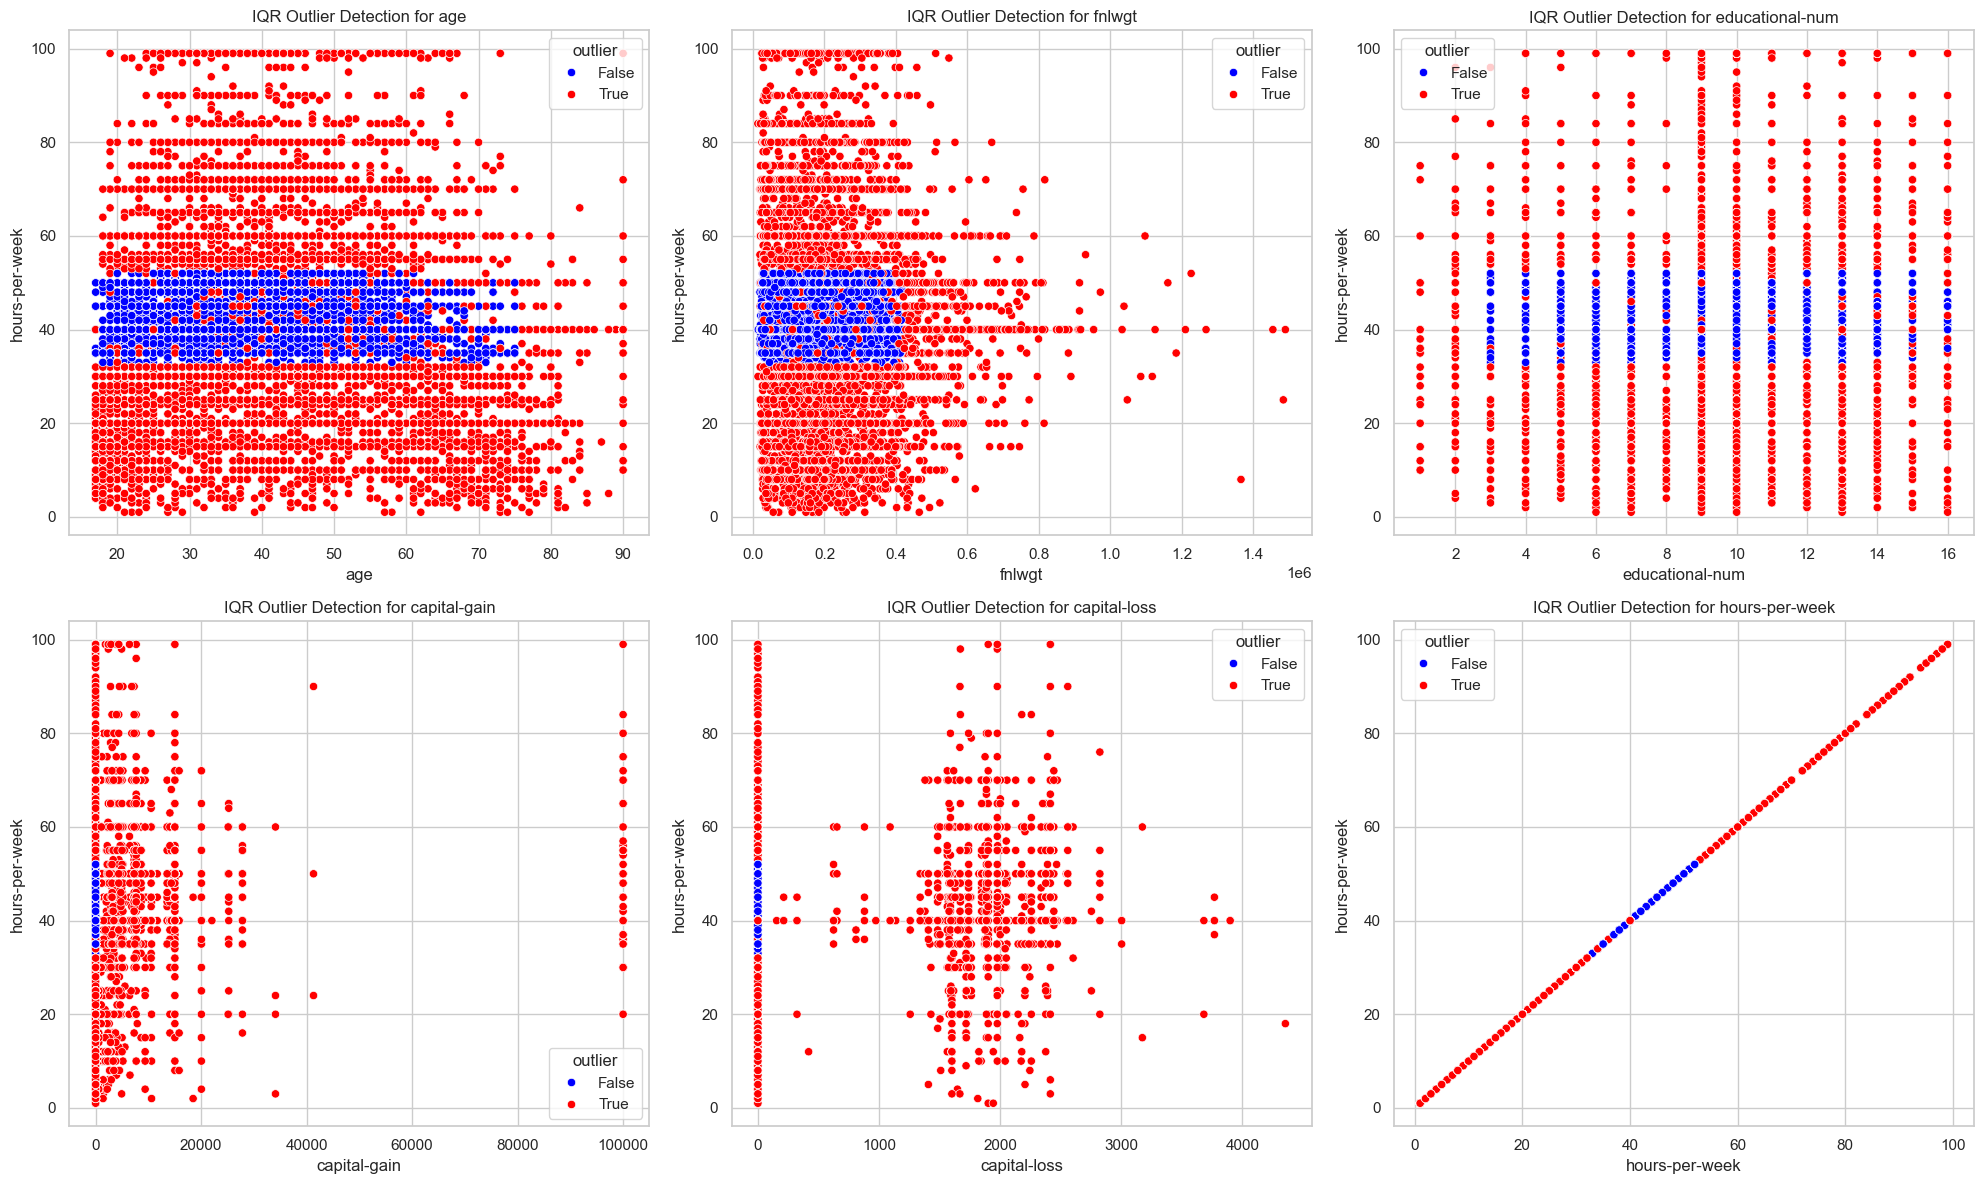

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset
numerical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize a DataFrame to store outlier information
outlier_flags = pd.DataFrame(index=df.index)

# Loop through each numerical column
for col in numerical_columns:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier step
    outlier_step = 1.5 * IQR
    
    # Identify outliers
    outliers = (df[col] < (Q1 - outlier_step)) | (df[col] > (Q3 + outlier_step))
    outlier_flags[col] = outliers

# Add an 'outlier' column to the DataFrame to flag rows with outliers in any column
df['outlier'] = outlier_flags.any(axis=1)

# Print the count of outliers for each column
print("Outlier counts per column:")
print(outlier_flags.sum())

# Visualization of outliers for each attribute
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Create scatterplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        data=df,
        x=col,
        y='hours-per-week',  # Use 'hours-per-week' as a reference y-axis for scatterplots
        hue='outlier',
        palette={True: 'red', False: 'blue'},
        legend='full'
    )
    plt.title(f'IQR Outlier Detection for {col}')
    plt.xlabel(col)
    plt.ylabel('hours-per-week')

plt.tight_layout()
plt.show()

#### **Outlier Analysis**

1. **Outliers Identified**:
   - Significant outliers were detected in `age`, `fnlwgt`, `educational-num`, `capital-gain`, `capital-loss`, and `hours-per-week`.
   - Notably, `capital-gain`, `capital-loss`, and `hours-per-week` showed the highest number of extreme values.

2. **Key Observations**:
   - **Age**: Outliers represent fringe age groups (e.g., very young or elderly individuals).
   - **Capital-gain/loss**: Highly skewed with most values at zero, and extreme values create significant outliers.
   - **Hours-per-week**: Outliers include individuals working very high or low hours, possibly indicating reporting errors or unusual work patterns.

3. **Recommendations**:
   - **Remove or cap extreme outliers** based on domain knowledge for variables like `hours-per-week` and `capital-gain/loss`.
   - **Transform skewed features** (e.g., log transformation) to normalize distributions.
   - Use **robust models** (e.g., tree-based) or apply **scaling techniques** to reduce the impact of outliers.

4. **Next Steps**:
   - Validate the legitimacy of extreme values with domain experts.
   - Test model performance with and without outlier adjustments to evaluate the impact.

### Imbalanced Data

### Feature Scaling (Normalization & Standardization) 

### Feature Selection

### Feature Reduction (Dimensionality Reduction)

## Data Prediction

### Data Splitting

### Categorical Models Comparison

### Fine Tuning Model

### Model Prediction

### Model Evaluation